In [15]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from pydantic import BaseModel,Field
load_dotenv()

True

In [2]:
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from operator import add

In [7]:
model = ChatOpenAI(model='gpt-4o-mini')

In [3]:
initialState ={"inputText":"Yamuna Pollution - Rivers in India are considered to be extremely sacred and are treated with great respect wherever they flow. Once the river boasted of its clear blue water, but now it has turned into one of the most polluted rivers in India, especially around the capital – New Delhi."}

In [14]:
class State(TypedDict):
    inputText:str
    grammerEval:str
    logicAnalyticEval:str
    textScore:Annotated[list[int],add]
    avg_score:float


In [6]:
# Structured Model
class EvalStrucModel(BaseModel):
    feedback:str = Field(description="Provide a summarize feedback in 100 words")
    score:int = Field(description="Provide scrore from 0 to 10",ge=0,le=10)

In [8]:
modelwithstruct=model.with_structured_output(EvalStrucModel)

In [36]:
def grammerEval(state:State):
    prompt = f"Evaulate the provided sentence based on Grammer - {state['inputText']}"
    output = modelwithstruct.invoke(prompt)
    feedback=output.feedback
    score = output.score
    return {"grammerEval":feedback,"textScore":[score]}

In [37]:
def logicAnalyticEval(state:State):
    prompt = f"Evaulate the provided sentence based on logic, completeness and analytical wise - {state['inputText']}"
    output = modelwithstruct.invoke(prompt)
    feedback=output.feedback
    score = output.score
    return {"logicAnalyticEval":feedback,"textScore":[score]}

In [ ]:
def calculateAvgScore(state:State):
    #print(state)
    avg_score = sum(state['textScore'])/len(state['textScore'])
    return {"avg_score":avg_score}

In [38]:
workflow= StateGraph(State)

In [39]:
workflow.add_node("grammerEval",grammerEval)
workflow.add_node("logicAnalyticEval",logicAnalyticEval)
workflow.add_node("calculateAvgScore",calculateAvgScore)

# edge 
workflow.add_edge(START,"grammerEval")
workflow.add_edge(START,"logicAnalyticEval")
workflow.add_edge("grammerEval","calculateAvgScore")
workflow.add_edge("logicAnalyticEval","calculateAvgScore")
workflow.add_edge("logicAnalyticEval",END)

In [40]:
graph= workflow.compile()

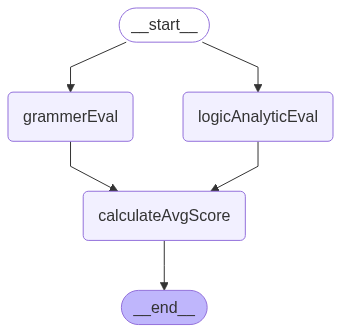

In [41]:
graph

In [42]:
inputText = "Our country has a rich history, diverse culture, valuable heritage and many unique aspects. Learning about these aspects lays the foundation of patriotism in children. The pride in their country motivates them to be good citizens and think about themselves as part of a larger community. In school, students are asked to write an essay on their country to increase their general knowledge and improve their writing skills. "
result = graph.invoke({"inputText":inputText})
result

{'inputText': 'Our country has a rich history, diverse culture, valuable heritage and many unique aspects. Learning about these aspects lays the foundation of patriotism in children. The pride in their country motivates them to be good citizens and think about themselves as part of a larger community. In school, students are asked to write an essay on their country to increase their general knowledge and improve their writing skills. ', 'grammerEval': 'The sentence is well-structured, with clear and coherent thoughts. It effectively communicates the importance of cultural knowledge and patriotism in children. However, a slight improvement could be made by adding a coordinating conjunction before the last item in the list ("unique aspects"), to enhance the flow of the enumeration. Overall, the grammar is correct, and the writing is articulate.', 'logicAnalyticEval': "The sentence presents a logical connection between understanding a country's history and culture and the development of p

{'inputText': 'Our country has a rich history, diverse culture, valuable heritage and many unique aspects. Learning about these aspects lays the foundation of patriotism in children. The pride in their country motivates them to be good citizens and think about themselves as part of a larger community. In school, students are asked to write an essay on their country to increase their general knowledge and improve their writing skills. ',
 'grammerEval': 'The sentence is well-structured, with clear and coherent thoughts. It effectively communicates the importance of cultural knowledge and patriotism in children. However, a slight improvement could be made by adding a coordinating conjunction before the last item in the list ("unique aspects"), to enhance the flow of the enumeration. Overall, the grammar is correct, and the writing is articulate.',
 'logicAnalyticEval': "The sentence presents a logical connection between understanding a country's history and culture and the development of